# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [92]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [93]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [94]:
# set up columns to hold information
city_names=[]
cloudiness=[]
humidity=[]
temp_max=[]
wind_speed=[]
lat=[]
lng=[]


# Counters
count1=0
count2=1
total_cities_count=0

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and run request
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        count1+=1
        print(f"Processing Record {count1} of Set {count2} | {city}")
        total_cities_count+=1
        if count1==50:
            count2+=1
            count1=0
            time.sleep(8)
    except:
        print(f'City not found. Skipping... {city}')
    
print(f"Total cities processed: {total_cities_count}")

# Make DataFrame from Dictionary of lists

df=pd.DataFrame({'city':city_names,
               'latitude':lat,
               'longitude':lng,
                'max_temperature':temp_max,
                'humidity':humidity,
                'cloudiness':cloudiness,
                'wind_speed':wind_speed})

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kapaa
City not found. Skipping... illoqqortoormiut
Processing Record 2 of Set 1 | osypenko
Processing Record 3 of Set 1 | imbituba
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | bac lieu
Processing Record 6 of Set 1 | chuy
City not found. Skipping... amderma
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | przasnysz
Processing Record 10 of Set 1 | khash
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | moranbah
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | cidreira
City not found. Skipping... grand river south east
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | alice spri

Processing Record 19 of Set 8 | bystryy istok
Processing Record 20 of Set 8 | kot diji
Processing Record 21 of Set 8 | ndola
Processing Record 22 of Set 8 | rafaela
Processing Record 23 of Set 8 | acaponeta
Processing Record 24 of Set 8 | buta
Processing Record 25 of Set 8 | krasnoselkup
City not found. Skipping... barawe
City not found. Skipping... rawannawi
Processing Record 26 of Set 8 | sinegorye
Processing Record 27 of Set 8 | ola
Processing Record 28 of Set 8 | georgetown
Processing Record 29 of Set 8 | mangrol
Processing Record 30 of Set 8 | pierre
Processing Record 31 of Set 8 | willmar
Processing Record 32 of Set 8 | baijiantan
Processing Record 33 of Set 8 | tommot
Processing Record 34 of Set 8 | sharan
Processing Record 35 of Set 8 | nemuro
Processing Record 36 of Set 8 | touros
Processing Record 37 of Set 8 | kimbe
Processing Record 38 of Set 8 | richards bay
Processing Record 39 of Set 8 | kuala kedah
City not found. Skipping... karakendzha
Processing Record 40 of Set 8 | 

Processing Record 3 of Set 12 | maceio
Processing Record 4 of Set 12 | yibin
Processing Record 5 of Set 12 | talaya
Processing Record 6 of Set 12 | murray bridge
Processing Record 7 of Set 12 | neryungri
Processing Record 8 of Set 12 | eureka
Processing Record 9 of Set 12 | cedar falls
Processing Record 10 of Set 12 | kyshtovka
Processing Record 11 of Set 12 | kismayo
Processing Record 12 of Set 12 | la palma
Processing Record 13 of Set 12 | hirado
Processing Record 14 of Set 12 | chapais
Processing Record 15 of Set 12 | buchanan
City not found. Skipping... kuche
Processing Record 16 of Set 12 | mugur-aksy
Processing Record 17 of Set 12 | sovetskiy
Processing Record 18 of Set 12 | sisimiut
Processing Record 19 of Set 12 | asheville
Processing Record 20 of Set 12 | godfrey
Processing Record 21 of Set 12 | ko samui
Processing Record 22 of Set 12 | latung
Processing Record 23 of Set 12 | vrdy
Processing Record 24 of Set 12 | anapskaya
City not found. Skipping... kalomo
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [95]:
df.count()

city               584
latitude           584
longitude          584
max_temperature    584
humidity           584
cloudiness         584
wind_speed         584
dtype: int64

In [96]:
df.head()

city  latitude  longitude  max_temperature  humidity  cloudiness  \
0      Kapaa     22.08    -159.32            23.00        78          75   
1   Osypenko     46.91      36.83             7.78       100           0   
2   Imbituba    -28.24     -48.67            17.00        63           1   
3  Busselton    -33.65     115.33            25.56        36          39   
4   Bac Lieu      9.29     105.72            31.12        58          37   

   wind_speed  
0        2.60  
1        3.13  
2        1.00  
3        5.58  
4        5.48

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [97]:
df.to_csv(output_data_file)

In [98]:
#read the cities.csv file
df=pd.read_csv(output_data_file)

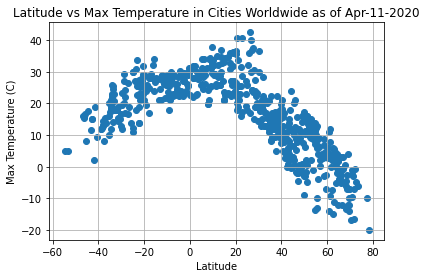

In [99]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["max_temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Max Temperature in Cities Worldwide as of Apr-11-2020")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_Cities_Worldwide_04112020.png")

# Show plot
plt.show()

Analysis: As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude) where .More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. 

#### Latitude vs. Humidity Plot

In [2]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity in Cities Worldwide as of Apr-11-2020")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_Cities_Worldwide_04112020.png")

# Show plot
plt.show()

NameError: name 'plt' is not defined

Analysis: The data points shows no correlation at all. Based on the plot it is conclusive that Latitude of cities worldwide did not affect Humidity on April-11-2020.

#### Latitude vs. Cloudiness Plot

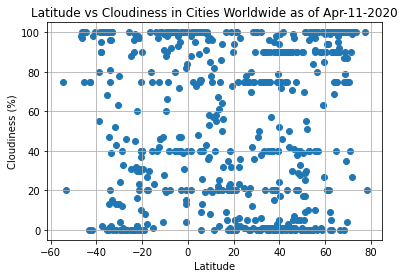

In [101]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness in Cities Worldwide as of Apr-11-2020")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_Cities_Worldwide_04112020.png")

# Show plot
plt.show()

Analysis: Similar to Humidity chart results, the City Latitude vs Cloudiness chart, the data points shows no correlation at all. Based on the plot it is conclusive that Latitude of cities worldwide did not affect Cloudiness on April-11-2020.

#### Latitude vs. Wind Speed Plot

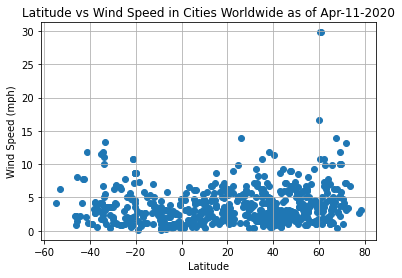

In [102]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed in Cities Worldwide as of Apr-11-2020")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_Cities_Worldwide_04112020.png")

# Show plot
plt.show()

Analysis: The City Latitude vs Wind Speed chart, have provided a very clear indicator that most of cities are are experiencing wind speed below 10mph. But similar to Humidity and Cloudines, it is found that there is no correlation between wind speed and latitude.

## Linear Regression

The r-squared is: -0.6303091225911838


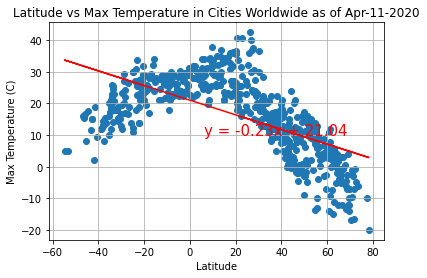

In [103]:
# OPTIONAL: Create a function to create Linear Regression plots
#MAX TEMPERATURE
# Assign the X and Y values
x_values = df["latitude"]
y_values = df["max_temperature"]
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
# Print out the r-squared value along with the plot.
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs Max Temperature in Cities Worldwide as of Apr-11-2020")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig("Max_Temp_Cities_Linear Regression_04112020.png")

Analysis: There is a negative relationship between Max Temperature and the Latitude as of Apr-11-2020. The Max Temperature increases while the Latitude decreases. Generally, There is a relationship between latitude and temperature around the world, as temperatures are typically warmer approaching the Equator and cooler approaching the Poles.

The r-squared is: 0.02742932532694219


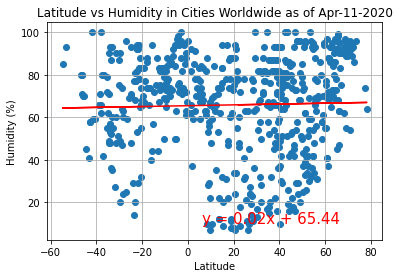

In [104]:
# OPTIONAL: Create a function to create Linear Regression plots
#HUMIDITY
# Assign the X and Y values
x_values = df["latitude"]
y_values = df["humidity"]
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
# Print out the r-squared value along with the plot.
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs Humidity in Cities Worldwide as of Apr-11-2020")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig("Humidity_Cities_Linear Regression_04112020.png")

Analysis: There is a no relationship between Humidity and Latitude as of Apr-11-2020. The Humidity increases and decreases at any given Latitude. Humidity is the concentration of water vapor present in the air, which is generally based on geographic location and presence of water in the environment.

The r-squared is: 0.06368859518236887


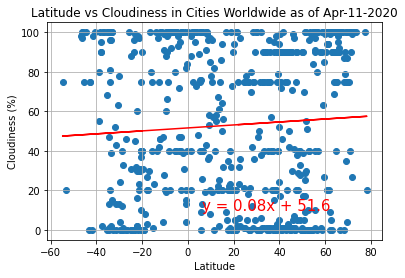

In [105]:
# OPTIONAL: Create a function to create Linear Regression plots
#CLOUDINESS
# Assign the X and Y values
x_values = df["latitude"]
y_values = df["cloudiness"]
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
# Print out the r-squared value along with the plot.
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness in Cities Worldwide as of Apr-11-2020")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig("Cloudiness_Cities_Linear Regression_04112020.png")

Analysis: There is a no relationship between Cloudiness and Latitude as of Apr-11-2020. The Cloudiness increases and decreases at any given Latitude. Cloudiness are produced through large scale air circulation patterns with the presence of water in the environment. Hence, it is possible that majority of the cities do not have windy climate on this day and the presence of water in the envionment is low.

The r-squared is: 0.11898991152967481


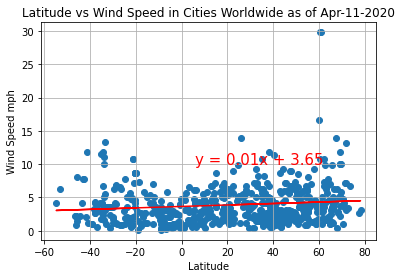

In [106]:
# OPTIONAL: Create a function to create Linear Regression plots
#WIND SPEED
# Assign the X and Y values
x_values = df["latitude"]
y_values = df["wind_speed"]
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
# Print out the r-squared value along with the plot.
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed in Cities Worldwide as of Apr-11-2020")
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig("Wind_Speed_Cities_Linear Regression_04112020.png")

Analysis: There is a no relationship between Windspeed and Latitude as of Apr-11-2020. The Windspeed are in similar range at any given Latitude. Windspeed are produced through atmospheric pressure and weather conditions, hence Latitude have minimal impact on Windspeed changes.

In [107]:
#Create Northern Dataframe

df1=pd.DataFrame({'city':city_names,
               'latitude':lat,
               'longitude':lng,
                'max_temperature':temp_max,
                'humidity':humidity,
                'cloudiness':cloudiness,
                'wind_speed':wind_speed})

cols = ['latitude']
df1[cols] = df1[df1[cols] > 0][cols]
df1 = df1.dropna()
df1

city  latitude  longitude  max_temperature  humidity  cloudiness  \
0        Kapaa     22.08    -159.32            23.00        78          75   
1     Osypenko     46.91      36.83             7.78       100           0   
4     Bac Lieu      9.29     105.72            31.12        58          37   
6       Albany     42.60     -73.97             0.00        68           1   
7     Khatanga     71.97     102.50            -0.82        93         100   
..         ...       ...        ...              ...       ...         ...   
576  Kavaratti     10.57      72.64            29.48        69          75   
578     Riyadh     24.69      46.72            23.00        31          75   
579     Ofakim     31.31      34.62            19.44        68           0   
580      Saýat     38.78      63.88            17.00        72          90   
582      Abnūb     27.27      31.15            24.30        24           0   

     wind_speed  
0          2.60  
1          3.13  
4          5.48  
6          1.12  
7         13.17  
..          ...  
576        2.84  
578        5.10  
579        0.45  
580        3.10  
582        5.27  

[405 rows x 7 columns]

In [108]:
#Create Southern Dataframe

df2=pd.DataFrame({'city':city_names,
               'latitude':lat,
               'longitude':lng,
                'max_temperature':temp_max,
                'humidity':humidity,
                'cloudiness':cloudiness,
                'wind_speed':wind_speed})

cols = ['latitude']
df2[cols] = df2[df2[cols] < 0][cols]
df2 = df2.dropna()
df2

city  latitude  longitude  max_temperature  humidity  \
2          Imbituba    -28.24     -48.67            17.00        63   
3         Busselton    -33.65     115.33            25.56        36   
5              Chui    -33.70     -53.46            14.20        87   
12         Moranbah    -22.00     148.05            25.37        29   
13        Carnarvon    -24.87     113.63            30.00        70   
..              ...       ...        ...              ...       ...   
555   Murray Bridge    -35.12     139.27            17.22        62   
560         Kismayo     -0.36      42.55            31.11        62   
577    Pouso Alegre    -22.23     -45.94            13.89        92   
581     Broken Hill    -31.95     141.43            18.00        27   
583  Cap Malheureux    -19.98      57.61            29.00        66   

     cloudiness  wind_speed  
2             1        1.00  
3            39        5.58  
5             2        1.61  
12            0        4.75  
13           31        7.70  
..          ...         ...  
555         100        1.79  
560          84        4.80  
577           2        0.71  
581          52        3.60  
583          40        8.70  

[179 rows x 7 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8705838788792107


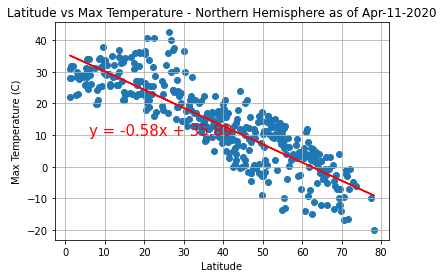

In [109]:
#MAX TEMPERATURE

# Assign the X and Y values
x_values = df1["latitude"]
y_values = df1["max_temperature"]
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
# Print out the r-squared value along with the plot.
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs Max Temperature - Northern Hemisphere as of Apr-11-2020")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig("Max_Temp_Cities_NorthernHemisphere_04112020.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6922476807813382


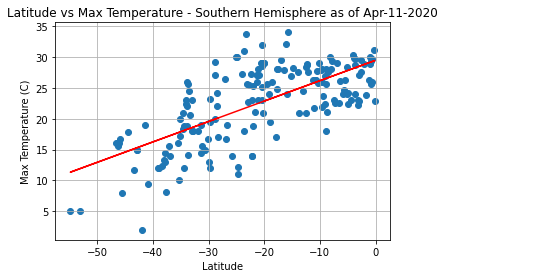

In [110]:
#MAX TEMPERATURE

# Assign the X and Y values
x2_values = df2["latitude"]
y2_values = df2["max_temperature"]
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y2_values)
regress_values = x2_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Build a scatter plot for each data type
plt.scatter(x2_values, y2_values, marker="o")
# Print out the r-squared value along with the plot.
plt.plot(x2_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs Max Temperature - Southern Hemisphere as of Apr-11-2020")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig("Max_Temp_Cities_SouthernHemisphere_04112020.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2557374684634019


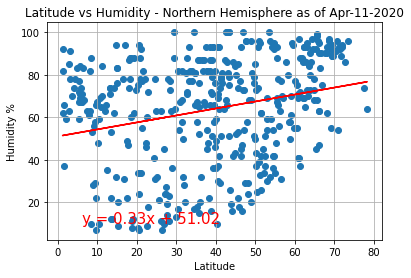

In [111]:
#HUMIDITY

# Assign the X and Y values
x_values = df1["latitude"]
y_values = df1["humidity"]
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
# Print out the r-squared value along with the plot.
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs Humidity - Northern Hemisphere as of Apr-11-2020")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig("Humidity_Cities_NorthernHemisphere_04112020.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2682171127228809


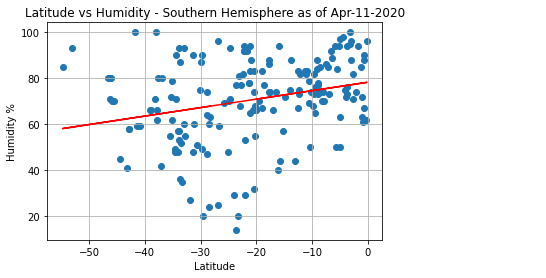

In [112]:
#HUMIDITY

# Assign the X and Y values
x2_values = df2["latitude"]
y2_values = df2["humidity"]
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y2_values)
regress_values = x2_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Build a scatter plot for each data type
plt.scatter(x2_values, y2_values, marker="o")
# Print out the r-squared value along with the plot.
plt.plot(x2_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs Humidity - Southern Hemisphere as of Apr-11-2020")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig("Humidity_Cities_SouthernHemisphere_04112020.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17562737857206875


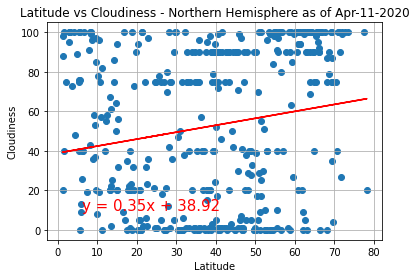

In [113]:
#CLOUDINESS

# Assign the X and Y values
x_values = df1["latitude"]
y_values = df1["cloudiness"]
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
# Print out the r-squared value along with the plot.
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness - Northern Hemisphere as of Apr-11-2020")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig("Cloudiness_Cities_NorthernHemisphere_04112020.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07730232103795893


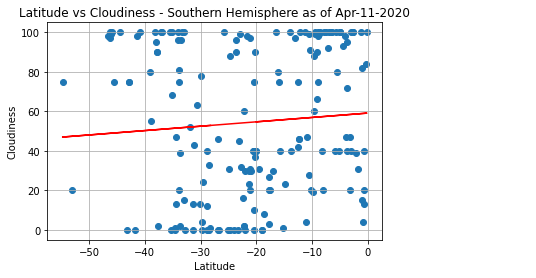

In [114]:
#CLOUDINESS

# Assign the X and Y values
x2_values = df2["latitude"]
y2_values = df2["cloudiness"]
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y2_values)
regress_values = x2_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Build a scatter plot for each data type
plt.scatter(x2_values, y2_values, marker="o")
# Print out the r-squared value along with the plot.
plt.plot(x2_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness - Southern Hemisphere as of Apr-11-2020")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig("Cloudiness_Cities_SouthernHemisphere_04112020.png")

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17315379407630827


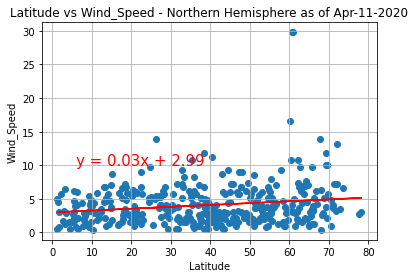

In [115]:
#WIND SPEED

# Assign the X and Y values
x_values = df1["latitude"]
y_values = df1["wind_speed"]
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
# Print out the r-squared value along with the plot.
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs Wind_Speed - Northern Hemisphere as of Apr-11-2020")
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig("WindSpeed_Cities_NorthernHemisphere_04112020.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.28438289664731103


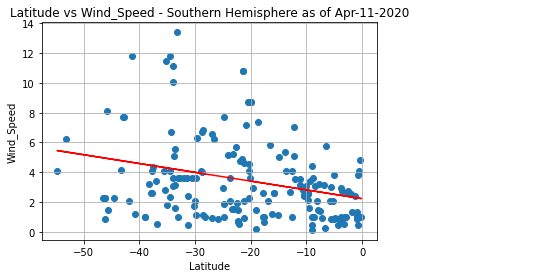

In [116]:
#WIND SPEED

# Assign the X and Y values
x2_values = df2["latitude"]
y2_values = df2["wind_speed"]
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y2_values)
regress_values = x2_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Build a scatter plot for each data type
plt.scatter(x2_values, y2_values, marker="o")
# Print out the r-squared value along with the plot.
plt.plot(x2_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs Wind_Speed - Southern Hemisphere as of Apr-11-2020")
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig("WindSpeed_Cities_SouthernHemisphere_04112020.png")